# PHYS650: Homework 3
AERONET Data Analysis

---
### 1) You will analyze AERONET data from two sites: https://aeronet.gsfc.nasa.gov/cgi-bin/bamgomas_interactive Plot (or copy image) and analyze AOD and Angstrom exponent for 2021 at these two sites. Briefly  describe similarities and explain differences in aerosol properties measured at these two sites. HINT: Take a look at other AERONET aerosol products.

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


---
### CCNY AERONET May 15 - 25, 2021
---

In [3]:
df = pd.read_csv(r"20210501_20210531_CCNY.lev10", sep=",", skiprows=6)
df.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:05:2021,13:33:36,121,121.565000,0.012067,0.026773,0.029920,-999.0,-999.0,0.038572,...,0.3793,0.3399,0.9373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:05:2021,13:38:36,121,121.568472,0.013065,0.028143,0.031041,-999.0,-999.0,0.040078,...,0.3793,0.3399,0.9373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:05:2021,13:43:37,121,121.571956,0.013338,0.028920,0.031309,-999.0,-999.0,0.040934,...,0.3793,0.3399,0.9373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:05:2021,13:48:37,121,121.575428,0.012659,0.028173,0.031251,-999.0,-999.0,0.039949,...,0.3793,0.3399,0.9373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:05:2021,13:53:37,121,121.578900,0.012728,0.028366,0.030823,-999.0,-999.0,0.039900,...,0.3793,0.3399,0.9373,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [45]:
#There are so many columns to remenber so I through them in a list
columns = df.columns.to_list()

# I need to make a datetime axis so I dod some glueing of Date and Time then convert to datatime and finally set as df.index
df["Datetime"] = pd.to_datetime([(f"{df[columns[0]].iloc[i]}".replace(":", "-") + " " + str(df[columns[1]].iloc[i])) for i in range(len(df))], format="%d-%m-%Y %H:%M:%S")
df.set_index(["Datetime"], inplace=True)

In [84]:
# for column in columns: print(column)
columns = ["AOD_1640nm", 
           "AOD_1020nm", 
           "AOD_870nm", 
           "AOD_865nm",
           "AOD_779nm",
           "AOD_675nm",
           "AOD_667nm",
           'AOD_620nm',
           'AOD_560nm',
           'AOD_555nm',
           'AOD_551nm',
           'AOD_532nm',
           'AOD_531nm',
           'AOD_510nm',
           'AOD_500nm',
           'AOD_490nm',
           'AOD_443nm',
           'AOD_440nm',
           'AOD_412nm',
           'AOD_400nm',
           'AOD_380nm',
           'AOD_340nm',
           'AOD_681nm',
           'AOD_709nm',
           "440-870_Angstrom_Exponent",
           '380-500_Angstrom_Exponent',
           '440-675_Angstrom_Exponent',
           '500-870_Angstrom_Exponent',
           '340-440_Angstrom_Exponent']

df = df.filter(columns)
df = df["2021-05-18":"2021-05-21"]
df.replace(-999, np.nan, inplace=True)

---
#### Aerosol Optical Depth (AOD)

In [85]:
AOD = df.filter(like='AOD_')
AOD.head()

,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,...,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,AOD_681nm,AOD_709nm
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-05-18 12:18:00,0.034647,0.060482,0.071265,NaN,NaN,0.103314,NaN,NaN,NaN,NaN,...,0.174735,NaN,NaN,0.215711,NaN,NaN,0.281984,0.338867,NaN,NaN
2021-05-18 12:23:00,0.034129,0.059576,0.069755,NaN,NaN,0.101118,NaN,NaN,NaN,NaN,...,0.170669,NaN,NaN,0.210354,NaN,NaN,0.276063,0.331768,NaN,NaN
2021-05-18 12:26:32,0.034720,0.060057,0.070665,NaN,NaN,0.102372,NaN,NaN,NaN,NaN,...,0.172026,NaN,NaN,0.212662,NaN,NaN,0.277751,0.333389,NaN,NaN
2021-05-18 12:43:00,0.034345,0.061337,0.072245,NaN,NaN,0.103722,NaN,NaN,NaN,NaN,...,0.175695,NaN,NaN,0.216505,NaN,NaN,0.285402,0.343600,NaN,NaN
2021-05-18 12:48:00,0.034902,0.061633,0.073037,NaN,NaN,0.105239,NaN,NaN,NaN,NaN,...,0.177875,NaN,NaN,0.218715,NaN,NaN,0.289116,0.348208,NaN,NaN


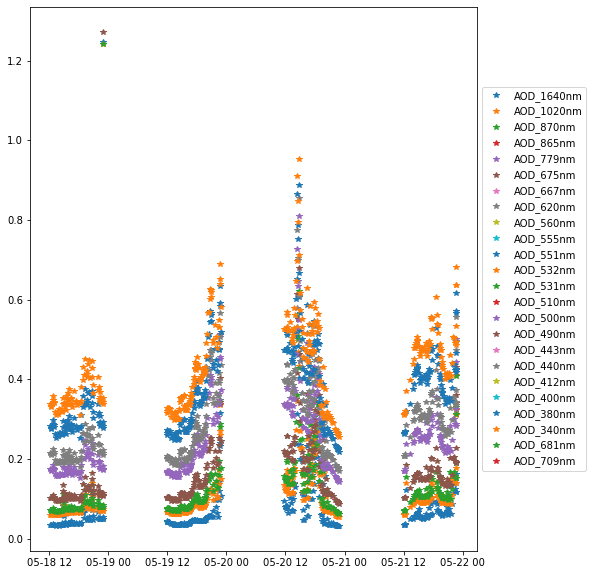

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
for col in AOD.columns:
    ax.plot(AOD.index, AOD[col], "*", label=f"{col}")
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

---
#### Angstrom Exponent

In [87]:
Ang = df.filter(like='_Angstrom_Exponent')
Ang.head()

,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent
Datetime,,,,,
2021-05-18 12:18:00,1.641381,1.735288,1.727213,1.623303,1.748186
2021-05-18 12:23:00,1.635917,1.744228,1.718943,1.619353,1.764189
2021-05-18 12:26:32,1.630666,1.736885,1.713601,1.610074,1.740347
2021-05-18 12:43:00,1.629213,1.760021,1.727617,1.609145,1.788558
2021-05-18 12:48:00,1.627785,1.762661,1.717949,1.611414,1.801156


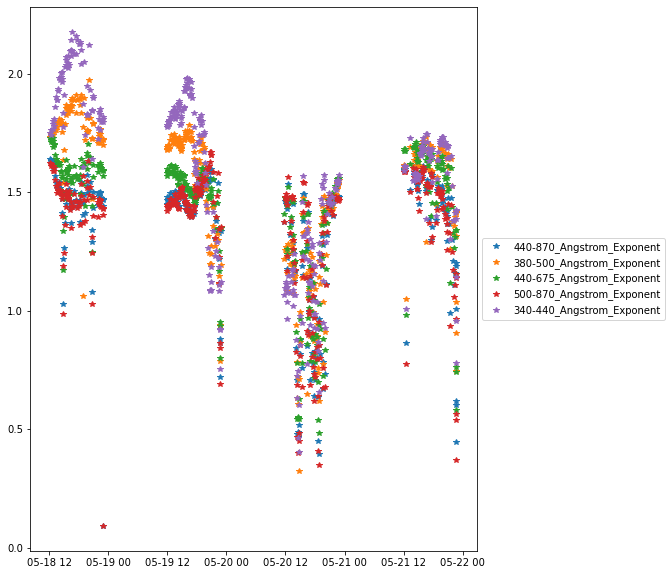

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
for col in Ang.columns:
    ax.plot(Ang.index, Ang[col], "*", label=f"{col}")
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))